# Multi-Linear Regression Model

In [30]:
import seaborn as sns 
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px

In [12]:
dataset=sns.get_dataset_names()
dataset

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [19]:
data=sns.load_dataset('taxis')
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [20]:
df=pd.DataFrame(data)

In [21]:
df.to_csv('taxi.csv')

In [22]:
df.drop('pickup',axis=1,inplace=True)

In [23]:
df.head()

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [24]:
df.drop('dropoff',axis=1,inplace=True)
df.drop('color',axis=1,inplace=True)
df.drop('pickup_zone',axis=1,inplace=True)
df.drop('dropoff_zone',axis=1,inplace=True)
df.drop('pickup_borough',axis=1,inplace=True)
df.drop('dropoff_borough',axis=1,inplace=True)

In [25]:
df.head()

,passengers,distance,fare,tip,tolls,total,payment
0,1,1.60,7.0,2.15,0.0,12.95,credit card
1,1,0.79,5.0,0.00,0.0,9.30,cash
2,1,1.37,7.5,2.36,0.0,14.16,credit card
3,1,7.70,27.0,6.15,0.0,36.95,credit card
4,3,2.16,9.0,1.10,0.0,13.40,credit card


In [28]:
df.to_csv('taxi_clean.csv')

In [27]:
df.drop('payment',axis=1,inplace=True)

In [29]:
df.head()

,passengers,distance,fare,tip,tolls,total
0,1,1.60,7.0,2.15,0.0,12.95
1,1,0.79,5.0,0.00,0.0,9.30
2,1,1.37,7.5,2.36,0.0,14.16
3,1,7.70,27.0,6.15,0.0,36.95
4,3,2.16,9.0,1.10,0.0,13.40


In [46]:
sample_data=df.sample(50)

In [57]:
sns.set(rc={'figure.figsize':(20,8)})

<AxesSubplot:xlabel='distance', ylabel='fare'>

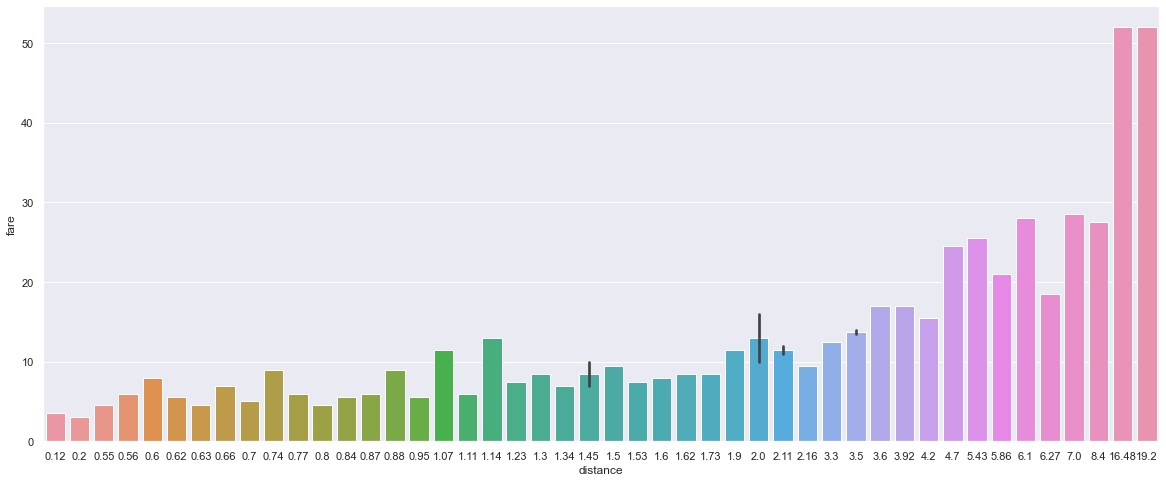

In [58]:
sns.barplot(x='distance',y='fare',data=sample_data)

<AxesSubplot:xlabel='distance', ylabel='total'>

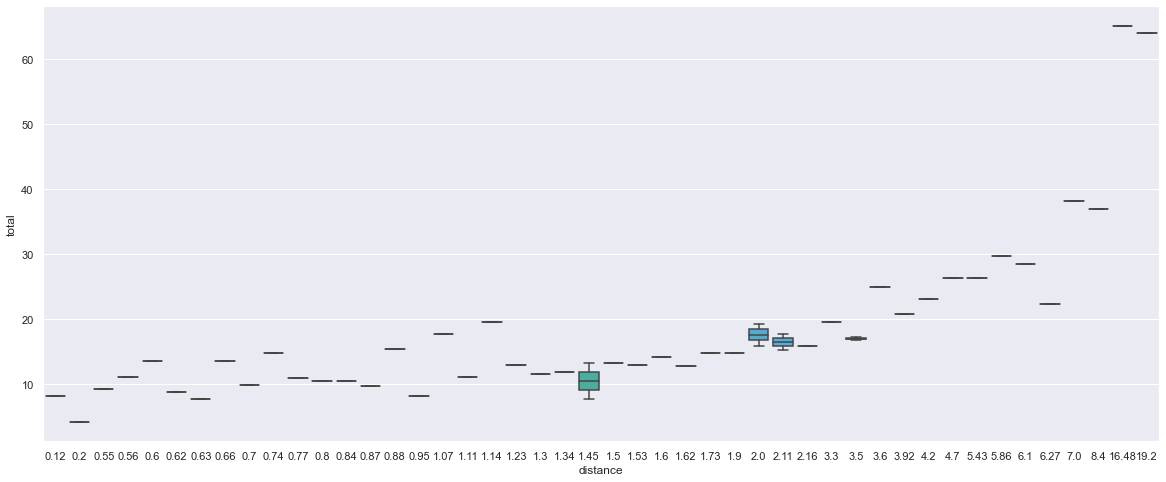

In [59]:
sns.boxplot(x='distance',y='total',data=sample_data)

<AxesSubplot:xlabel='fare', ylabel='total'>

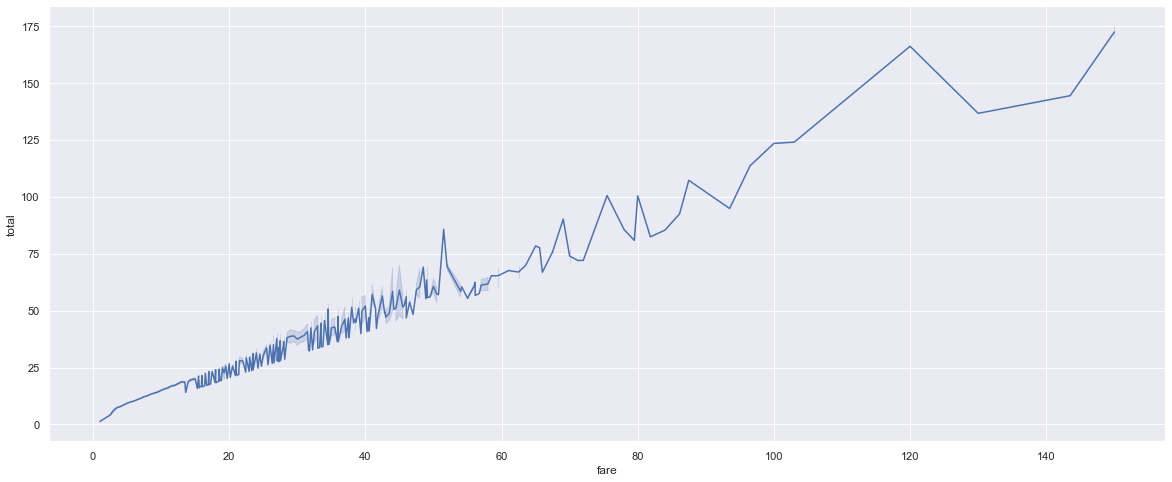

In [60]:
sns.lineplot(x='fare',y='total',data=df)

In [61]:
corr=df.corr()

<AxesSubplot:>

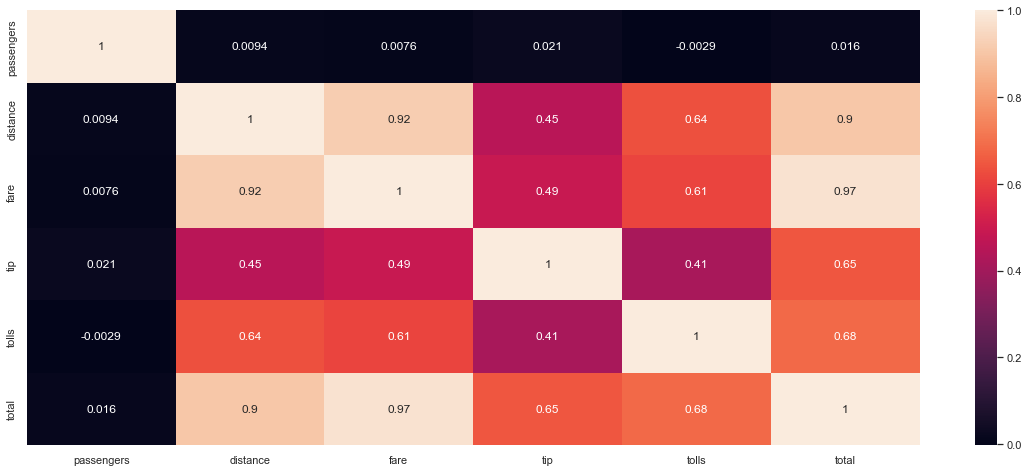

In [65]:
sns.heatmap(corr,annot=True)

## Splitting the Data

In [72]:
df.shape

(6433, 6)

In [93]:
x=df.iloc[:,:5].values
y=df.iloc[:,5:].values

In [79]:
x

array([[ 1.  ,  1.6 ,  7.  ,  2.15,  0.  ],
       [ 1.  ,  0.79,  5.  ,  0.  ,  0.  ],
       [ 1.  ,  1.37,  7.5 ,  2.36,  0.  ],
       ...,
       [ 1.  ,  4.14, 16.  ,  0.  ,  0.  ],
       [ 1.  ,  1.12,  6.  ,  0.  ,  0.  ],
       [ 1.  ,  3.85, 15.  ,  3.36,  0.  ]])

# Model Training, Testing and Fitting

In [94]:
# split the data into training set and testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [95]:
#fitting the linear model
model=LinearRegression().fit(x_train,y_train)
model

LinearRegression()

In [96]:
model.score(x_train,y_train)

0.9937604080173058

In [99]:
df.head()

,passengers,distance,fare,tip,tolls,total
0,1,1.60,7.0,2.15,0.0,12.95
1,1,0.79,5.0,0.00,0.0,9.30
2,1,1.37,7.5,2.36,0.0,14.16
3,1,7.70,27.0,6.15,0.0,36.95
4,3,2.16,9.0,1.10,0.0,13.40


In [109]:
model.predict([[1,7.70,27.0,6.15,0.0]])

array([[36.52992791]])

In [101]:
model.predict([[4,9.4,10.0,0.9,0.1]])

array([[14.15332483]])

In [108]:
model.predict([[2,4.4,5.0,0.5,0.1]])

array([[8.72911299]])

In [103]:
xtrain=model.predict(x_train)
xtrain

array([[ 9.92820419],
       [11.94095089],
       [ 9.86680779],
       ...,
       [ 9.94549185],
       [ 9.50842615],
       [14.76853111]])

In [104]:
xtest=model.predict(x_test)
xtest 

array([[74.82760125],
       [23.12035156],
       [ 9.02091186],
       ...,
       [10.02833971],
       [ 8.05367526],
       [ 9.26975594]])

In [105]:
model.score(x_train,y_train)

0.9937604080173058

In [106]:
model.score(x_test,y_test)

0.9948734611875015

In [107]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,xtest)

1.141917639301164